In [1]:

# Random Forest Classification

# --> Supervised learning

# --> Picks the random variables and makes many decision trees and then 
#     compares the output of the certain number of trees made and then gives the output.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from joblib import Parallel, delayed

In [3]:
url='https://raw.githubusercontent.com/redashu/Datasets/master/social.csv'
df = pd.read_csv(url)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
wf=df.copy()

In [5]:
#one hot encoding used for categorical variables
encoded = pd.get_dummies(wf, columns = [ 'Gender'])
encoded

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,False,True
1,15810944,35,20000,0,False,True
2,15668575,26,43000,0,True,False
3,15603246,27,57000,0,True,False
4,15804002,19,76000,0,False,True
...,...,...,...,...,...,...
395,15691863,46,41000,1,True,False
396,15706071,51,23000,1,False,True
397,15654296,50,20000,1,True,False
398,15755018,36,33000,0,False,True


In [6]:
#picking age and salary as features
features = wf.iloc[:,2:-1].values
labels = wf. iloc[:,-1].values
labels

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

In [7]:
X_Train,x_test,Y_Train,y_test = train_test_split(features,labels,test_size=0.3,random_state=45)

In [8]:
#Feature Scaling

SS = StandardScaler()

Scaled_X = SS.fit_transform(X_Train)

In [9]:
#calling knn classifier
knn = KNeighborsClassifier(n_neighbors=5)
# calling Random forest clf
random_f=RandomForestClassifier(n_estimators=10,criterion='entropy')

In [10]:
# Define a function for training a classifier
def train_classifier(classifier, X, Y):
    return classifier.fit(X, Y)

In [11]:
# Define the number of jobs (threads) to use for training
n_jobs = 2  

In [12]:
# Use Parallel and delayed to train both classifiers in parallel
trained_knn, train_random = Parallel(n_jobs=n_jobs)(
    delayed(train_classifier)(classifier, Scaled_X, Y_Train) for classifier in [knn, random_f]
)
#Now transform the x_test
scaled_x_test=SS.transform(x_test)

In [13]:
# #use multi threading concept in training section
# #show the graphs of the random forest
# trained = knn.fit(Scaled_X,Y_Train)
# train_random=random_f.fit(Scaled_X,Y_Train)

In [14]:
predicted_output = trained_knn.predict(scaled_x_test)
predicted_output_random = train_random.predict(scaled_x_test)

In [15]:
predicted_output
predicted_output_random

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0], dtype=int64)

In [16]:
from sklearn.tree import plot_tree

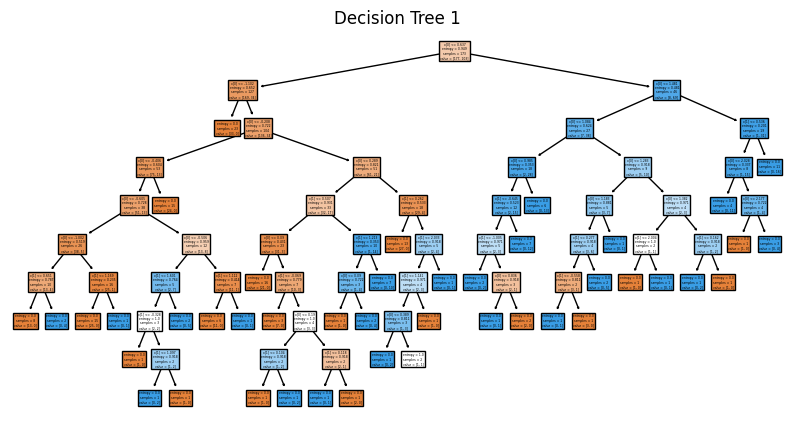

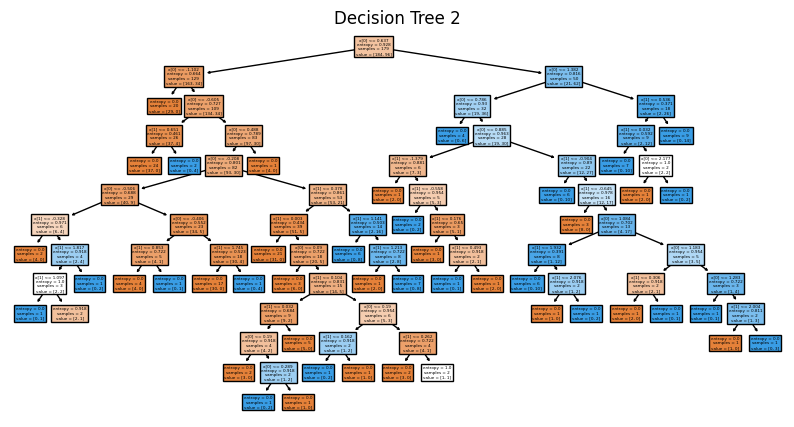

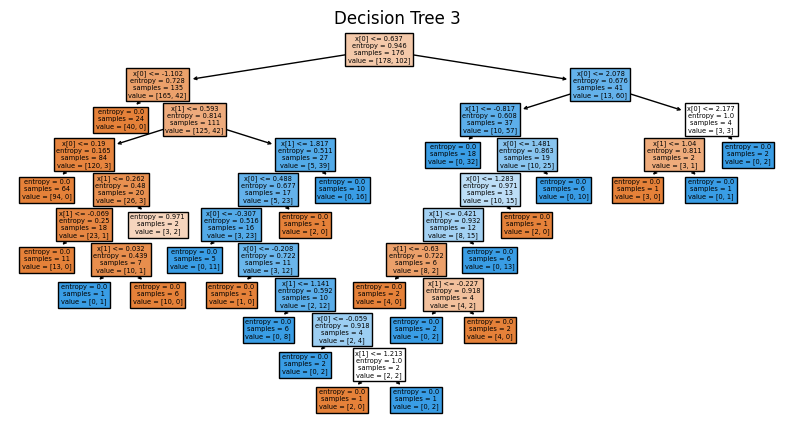

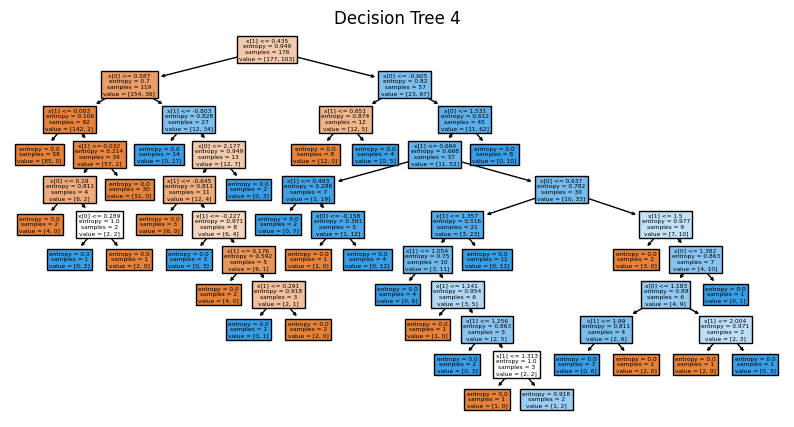

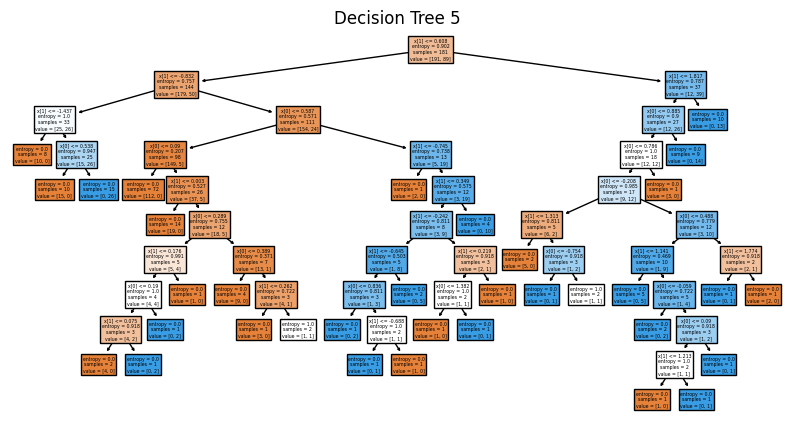

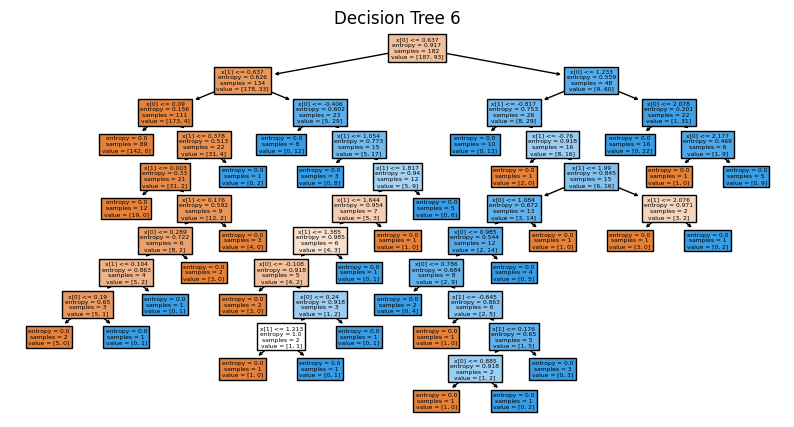

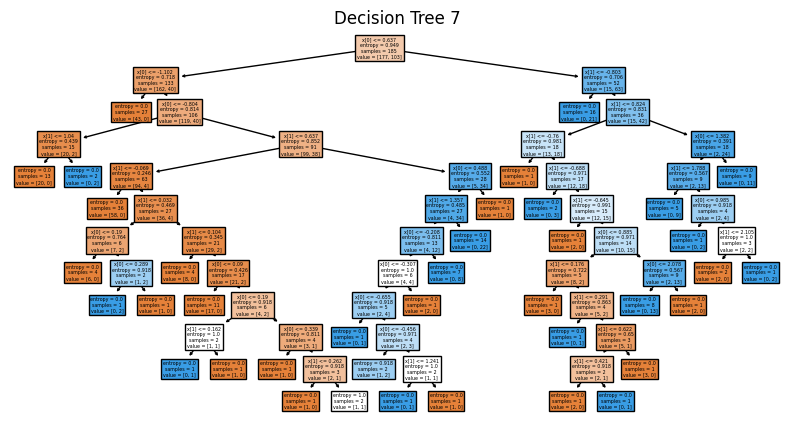

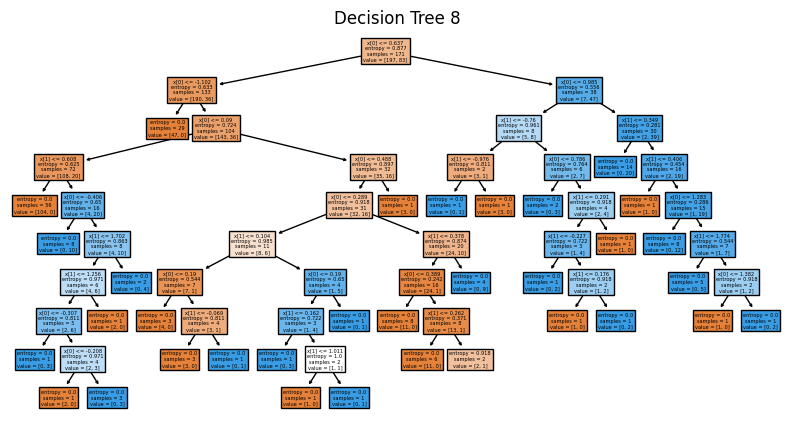

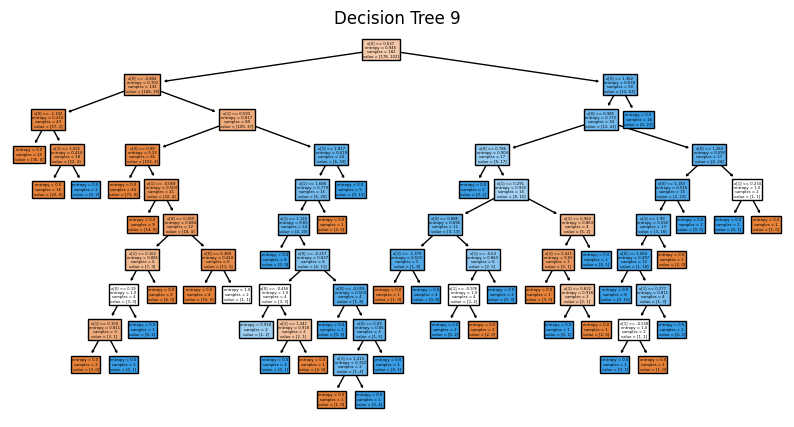

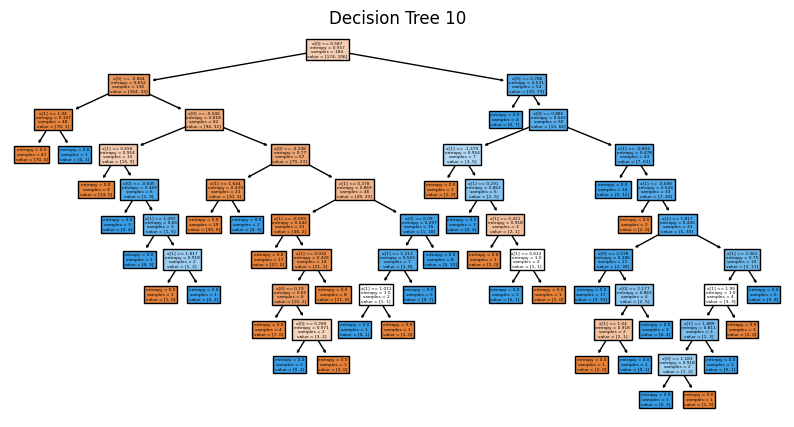

In [17]:
# Visualize each decision tree in the ensemble
for i in range(len(train_random.estimators_)):
    plt.figure(figsize=(10, 5))
    plot_tree(train_random.estimators_[i], filled=True)
    plt.title(f"Decision Tree {i+1}")
    plt.show()